In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\ACER\Downloads\archive (8).zip")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [3]:
x=df.drop(columns=['Serial No.','Chance of Admit'])
y=df.iloc[:,-1]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.25,random_state=12)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
logr=LogisticRegression(penalty=None,max_iter=350)

In [9]:
logr.fit(xtr,ytr)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,350
,multi_class,'deprecated'


In [10]:
ypred=logr.predict(xte)

In [11]:
from sklearn.metrics import accuracy_score,f1_score

In [12]:
acc=accuracy_score(yte,ypred)
f1=f1_score(yte,ypred)
print(acc)
print(f1)

0.87
0.8354430379746836


### Applying PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca=PCA(n_components=2)

In [15]:
df2=pd.DataFrame()

In [16]:
df2[['pc1','pc2']]=pca.fit_transform(x)

In [17]:
df2['Admission']=df['Chance of Admit']

In [18]:
x2=df2.drop(columns=['Admission'])
y2=df2.iloc[:,-1]

In [19]:
xtr2,xte2,ytr2,yte2=train_test_split(x2,y2,test_size=0.2)

In [20]:
log2=LogisticRegression(penalty=None,max_iter=350)

In [21]:
log2.fit(xtr2,ytr2)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,350
,multi_class,'deprecated'


In [22]:
ypred2=log2.predict(xte2)

In [23]:
acc2=accuracy_score(yte2,ypred2)
f12=f1_score(yte2,ypred2)
print(acc2)
print(f12)

0.8375
0.8354430379746836


In [24]:
x1 = df2.iloc[:,0]   
x2 = df2.iloc[:,1]   

x_min,x_max =x1.min()-1, x1.max()+1
y_min,y_max =x2.min()-1, x2.max()+1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200))


C:\Users\ACER\anaconda3\envs\AI_env1\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


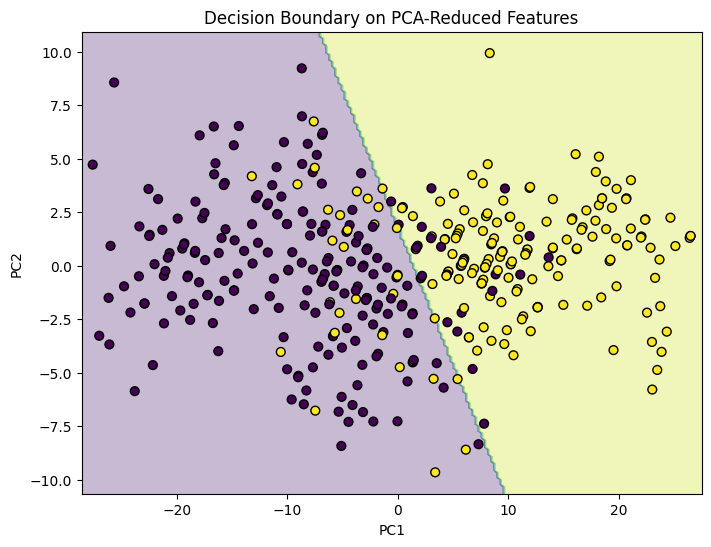

In [27]:
Z = log2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(x1, x2, c=y, s=40, edgecolors="k")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Decision Boundary on PCA-Reduced Features")
plt.show()